In [ ]:
from google.colab import files
 
uploaded = files.upload()

Saving matriz_distancias.csv to matriz_distancias.csv


In [ ]:
import pandas as pd
import io
 
df = pd.read_csv(io.BytesIO(uploaded['matriz_distancias.csv']))
print(df)

    0   7   9   8  20
0   7   0  10   4  11
1   9  10   0  15   5
2   8   4  15   0  17
3  20  11   5  17   0


In [ ]:
import csv
import random

# Parámetros del algoritmo genético
tamaño_población = 50
probabilidad_mutación = 0.2
num_generaciones = 100

# Cargar la matriz de distancias desde el archivo CSV
def cargar_matriz_csv(archivo_csv):
    matriz = []
    with open(archivo_csv, 'r') as archivo:
        lector_csv = csv.reader(archivo)
        for fila in lector_csv:
            matriz.append([int(distancia) for distancia in fila])
    return matriz

# Inicializar una población aleatoria de soluciones
def inicializar_población(tamaño_población, num_ciudades):
    población = []
    for _ in range(tamaño_población):
        solución = list(range(num_ciudades))
        random.shuffle(solución)
        población.append(solución)
    return población

# Calcular la aptitud de una solución (menor distancia recorrida)
def calcular_aptitud(solución, matriz_distancias):
    aptitud = 0
    for i in range(len(solución)):
        ciudad_actual = solución[i]
        ciudad_siguiente = solución[(i + 1) % len(solución)]
        aptitud += matriz_distancias[ciudad_actual][ciudad_siguiente]
    return aptitud

# Seleccionar padres mediante el método de la ruleta
def seleccionar_padres(población, matriz_distancias):
    total_aptitudes = sum([calcular_aptitud(solución, matriz_distancias) for solución in población])
    r = random.uniform(0, total_aptitudes)
    acumulador = 0
    for solución in población:
        aptitud = calcular_aptitud(solución, matriz_distancias)
        acumulador += aptitud
        if acumulador >= r:
            return solución

# Cruzar dos soluciones para generar un hijo
def cruzar_padres(padre1, padre2):
    punto_corte = random.randint(0, len(padre1) - 1)
    hijo = padre1[:punto_corte]
    for gen in padre2:
        if gen not in hijo:
            hijo.append(gen)
    return hijo

# Mutar una solución intercambiando dos ciudades
def mutar_solución(solución):
    i, j = random.sample(range(len(solución)), 2)
    solución[i], solución[j] = solución[j], solución[i]

# Algoritmo genético
def algoritmo_genético(matriz_distancias):
    num_ciudades = len(matriz_distancias)
    población = inicializar_población(tamaño_población, num_ciudades)

    for _ in range(num_generaciones):
        nueva_población = []

        for _ in range(tamaño_población // 2):
            padre1 = seleccionar_padres(población, matriz_distancias)
            padre2 = seleccionar_padres(población, matriz_distancias)

            hijo1 = cruzar_padres(padre1, padre2)
            hijo2 = cruzar_padres(padre2, padre1)

            if random.random() < probabilidad_mutación:
                mutar_solución(hijo1)
                mutar_solución(hijo2)

            nueva_población.extend([hijo1, hijo2])

        población = nueva_población

    mejor_solución = min(población, key=lambda solución: calcular_aptitud(solución, matriz_distancias))
    mejor_aptitud = calcular_aptitud(mejor_solución, matriz_distancias)

    return mejor_solución, mejor_aptitud

# Ejemplo de uso
matriz_distancias = cargar_matriz_csv('matriz_distancias.csv')
mejor_solución, mejor_aptitud = algoritmo_genético(matriz_distancias)
print("Se representa A=0, B=1, C=2, D=3, E=4")
print("Mejor solución encontrada:", mejor_solución)
print("Mejor aptitud encontrada:", mejor_aptitud)


Se representa A=0, B=1, C=2, D=3, E=4
Mejor solución encontrada: [0, 3, 1, 4, 2]
Mejor aptitud encontrada: 37


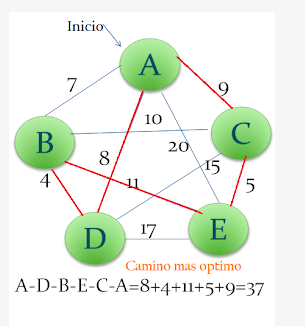